Web Scraping 

In [16]:
from bs4 import BeautifulSoup
import requests


In [18]:
reviews = [] # list to store reviews

In [25]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways/'
pages = 10
page_size = 100

#checking out for the total number of pages; each page contains 100 reviews
for i in range(1, pages + 1):
    print(f"  --> Scraping page {i} of {pages}")
    url = f'https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}'
    page = requests.get(url) # collecting data from page
    content = page.content # getting the content of the page
    parsed_content = BeautifulSoup(content, 'html.parser') # parsing the content of the page
    for i in parsed_content.find_all('div', {"class": 'text_content'}):
        reviews.append(i.get_text)

# BeautifulSoup(page.content, 'html')
# content = page.content  
# parsed_content = BeautifulSoup(content, 'html.parser')
# for i in parsed_content.find_all('div', class_='text_content'):
#     reviews.append(i.text)

    print(f"  --> {len(reviews)} total reviews found")
    

  --> Scraping page 1 of 10
  --> 2220 total reviews found
  --> Scraping page 2 of 10
  --> 2320 total reviews found
  --> Scraping page 3 of 10
  --> 2420 total reviews found
  --> Scraping page 4 of 10
  --> 2520 total reviews found
  --> Scraping page 5 of 10
  --> 2620 total reviews found
  --> Scraping page 6 of 10
  --> 2720 total reviews found
  --> Scraping page 7 of 10
  --> 2820 total reviews found
  --> Scraping page 8 of 10
  --> 2920 total reviews found
  --> Scraping page 9 of 10
  --> 3020 total reviews found
  --> Scraping page 10 of 10
  --> 3120 total reviews found


In [41]:
import pandas as pd

df = pd.DataFrame({'Reviews': reviews})
df.to_csv('british_airways_reviews.csv', index=False)



In [42]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I strongly advise everyone t...
1,✅ Trip Verified | My partner and I were on the...
2,Not Verified | We had a Premium Economy retur...
3,✅ Trip Verified | I should like to review my ...
4,✅ Trip Verified | We have flown with British A...


Reviews Cleaning


In [45]:
df.reviews = df.reviews.str.split('|', expand=True)[1]

In [40]:
df

,Reviews,reviews
0,✅ Trip Verified | I strongly advise everyone t...,I strongly advise everyone to NEVER fly Briti...
1,✅ Trip Verified | My partner and I were on the...,My partner and I were on the BA2166 return fl...
2,Not Verified | We had a Premium Economy retur...,We had a Premium Economy return flight Los A...
3,✅ Trip Verified | I should like to review my ...,I should like to review my flight with Briti...
4,✅ Trip Verified | We have flown with British A...,We have flown with British Airways a few time...
...,...,...
3115,<bound method PageElement.get_text of <div cla...,NaN
3116,<bound method PageElement.get_text of <div cla...,NaN
3117,<bound method PageElement.get_text of <div cla...,NaN
3118,<bound method PageElement.get_text of <div cla...,NaN


Cleaning the text

In [47]:
import re


def clean(text): # Function to clean the text in the review column
# Removes all special characters
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I strongly advise everyone to NEVER fly Briti...,I strongly advise everyone to NEVER fly Briti...
1,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...
2,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...
3,I should like to review my flight with Briti...,I should like to review my flight with Britis...
4,We have flown with British Airways a few time...,We have flown with British Airways a few time...


STOPWORDS

In [51]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /Users/nathbobs/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathbobs/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nathbobs/nltk_data...


In [52]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nathbobs/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nathbobs/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I strongly advise everyone to NEVER fly Briti...,I strongly advise everyone to NEVER fly Briti...,"[(strongly, r), (advise, v), (everyone, n), (N..."
1,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...,"[(partner, n), (BA, n), (return, n), (flight, ..."
2,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli..."
3,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British..."
4,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time..."


LEMITIZATION

In [53]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I strongly advise everyone to NEVER fly Briti...,I strongly advise everyone to NEVER fly Briti...,"[(strongly, r), (advise, v), (everyone, n), (N...",strongly advise everyone NEVER fly British A...
1,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...,"[(partner, n), (BA, n), (return, n), (flight, ...",partner BA return flight Tampa Gatwick excit...
2,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli...",Premium Economy return flight Los Angeles Lo...
3,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British...",like review flight British Airways Hannover ...
4,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time...",fly British Airways time last trip far bad e...


In [55]:
df[['reviews', 'Lemma']].head()

,reviews,Lemma
0,I strongly advise everyone to NEVER fly Briti...,strongly advise everyone NEVER fly British A...
1,My partner and I were on the BA2166 return fl...,partner BA return flight Tampa Gatwick excit...
2,We had a Premium Economy return flight Los A...,Premium Economy return flight Los Angeles Lo...
3,I should like to review my flight with Briti...,like review flight British Airways Hannover ...
4,We have flown with British Airways a few time...,fly British Airways time last trip far bad e...


REVIEWS SENTIMENT ANALYSIS USING VADER SENTIMENT ANALYSIS

In [56]:
%pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# calculating vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# analysing the sentiment   
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I strongly advise everyone to NEVER fly Briti...,I strongly advise everyone to NEVER fly Briti...,"[(strongly, r), (advise, v), (everyone, n), (N...",strongly advise everyone NEVER fly British A...,0.9708,Positive
1,My partner and I were on the BA2166 return fl...,My partner and I were on the BA return flight...,"[(partner, n), (BA, n), (return, n), (flight, ...",partner BA return flight Tampa Gatwick excit...,0.8107,Positive
2,We had a Premium Economy return flight Los A...,We had a Premium Economy return flight Los An...,"[(Premium, a), (Economy, n), (return, n), (fli...",Premium Economy return flight Los Angeles Lo...,-0.3538,Negative
3,I should like to review my flight with Briti...,I should like to review my flight with Britis...,"[(like, v), (review, v), (flight, n), (British...",like review flight British Airways Hannover ...,0.9867,Positive
4,We have flown with British Airways a few time...,We have flown with British Airways a few time...,"[(flown, v), (British, n), (Airways, n), (time...",fly British Airways time last trip far bad e...,0.1531,Neutral


In [58]:
#seperating the positive, negative and neutral reviews
vader_count = df['Analysis'].value_counts()
vader_count

Analysis
Neutral     2127
Positive     525
Negative     468
Name: count, dtype: int64

Visualization


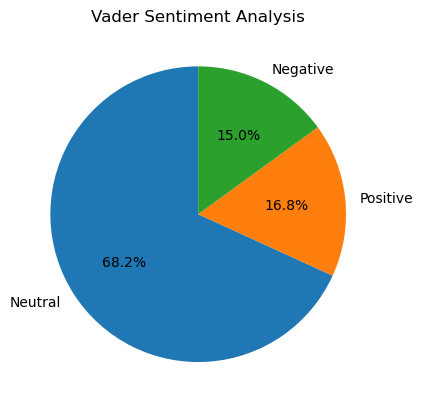

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Vader Sentiment Analysis')
plt.pie(vader_count, labels = vader_count.index, autopct='%1.1f%%', startangle=90)
plt.show() 

WORDCLOUD

In [72]:

%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


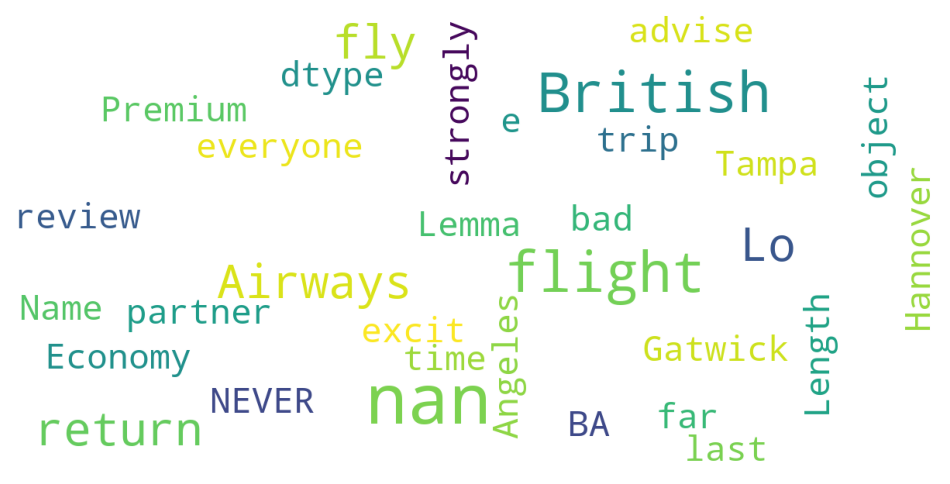

: 

In [75]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

#wordclouds for visualising keywords on websites

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)